# Sensor Component Failure Prediction

##  Problem Statement:

### Data: Sensor Data

a. The system in focus is the Air Pressure system (APS) which generates pressurized air that is utilized in various functions in a vehicle, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to vehicless with failures for components not related to the APS system.

b. The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnessecary check needs to be done by a mechanic at workshop, while Cost_2 refers to the cost of missing a faulty vehicle, which may cause a breakdown.

Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.

(where cost 1 = 10 and cost2 = 500)

From the above problem statement we could observe that, we have to reduce false positives and false negatives. More importantly we have to reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.

### Challenges and Objectives:

 - Need to Handle many Null values in almost all columns
 - No low-latency requirement.
 - Interpretability is not important.
 - misclassification leads the unecessary repair costs.

In [37]:
### Importing Required Libraries:

import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

### Read Data:

In [38]:
# Loading CSV File:

df = pd.read_csv("aps_failure_training_set.csv", na_values="na")

In [39]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [40]:
# checking the dataset shape:

df.shape

(36188, 171)

In [41]:
# checking unique values of target variable:
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [42]:
# Defile Numerical and Categorical Column:

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

### There is no need for the interpretation of this data as this is Sensor Data:

### Checking Missing Values:

In [43]:
df.isna().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [44]:
## Too many, lets plot a graph for Missing Values:
df.isnull()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36184,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36186,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

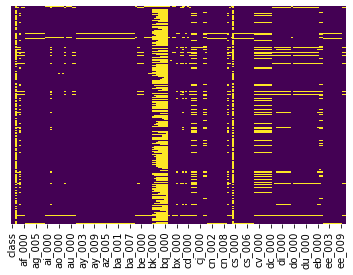

In [45]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [46]:
# Plotting Missing values count in Percentages for each item:
missing = df.isna().sum()
missing

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [47]:
missing = missing.div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
missing

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
...,...
cj_000,0.560959
ci_000,0.560959
bt_000,0.237648
aa_000,0.000000


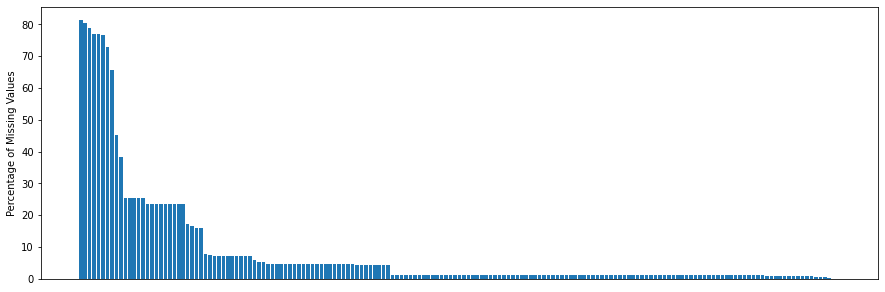

In [48]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage of Missing Values")
plt.show()

#### There are too many columns that have more than 70% Missing Values. Dropping these columns with > 70% Missing

In [49]:
drop_cols = missing[missing[0]>70]
drop_cols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [50]:
df.drop(list(drop_cols.index), axis=1, inplace=True)

In [51]:
# checking df shape after dropping columns that have > null values:
df.shape

(36188, 164)

### Check the total percentage of missing values of full dataset after dropping columns with more than 70% of missing values

In [71]:
missing_value_counts = df.isnull().sum()

In [80]:
total_missing = missing_value_counts.sum()

In [73]:
total_cells = np.prod(df.shape)
total_cells

5934832

#### Percentage of data that is missing:

In [81]:
print(f"Percentage of total missing cells in the data are: {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data are: 5.37059852747306%


Ideally, there are more missing values to handle for columns those have > 40% missing, but we are considering the total number for now which is not too high

### Unique Values in Target Variables:

In [90]:
pos = df[df['class']=='pos'].shape[0]
neg = df[df['class']=='neg'].shape[0]

print(f"Positive: {pos}, Negative: {neg}")

Positive: 1000, Negative: 35188


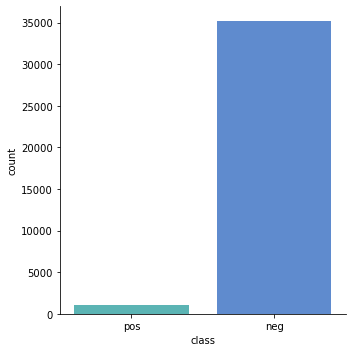

In [134]:
### Plotting the View:

sns.catplot(data=df, x='class', kind='count', palette='winter_r', alpha=0.7)

### Report

 - The target classes are highly imbalanced
 - Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
 - If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
 - Hence we should handle imbalanced data with certain methods.

#### How to Handle Imbalanced Data?

 - Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
 - SMOTE: Synthetic Minority Oversampling Technique
 - SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
 - Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
 - It only duplicates the data and it won't add and new information. Hence will look at some different techniques.

### Plot Distribution for all Independent Numerical Variables:

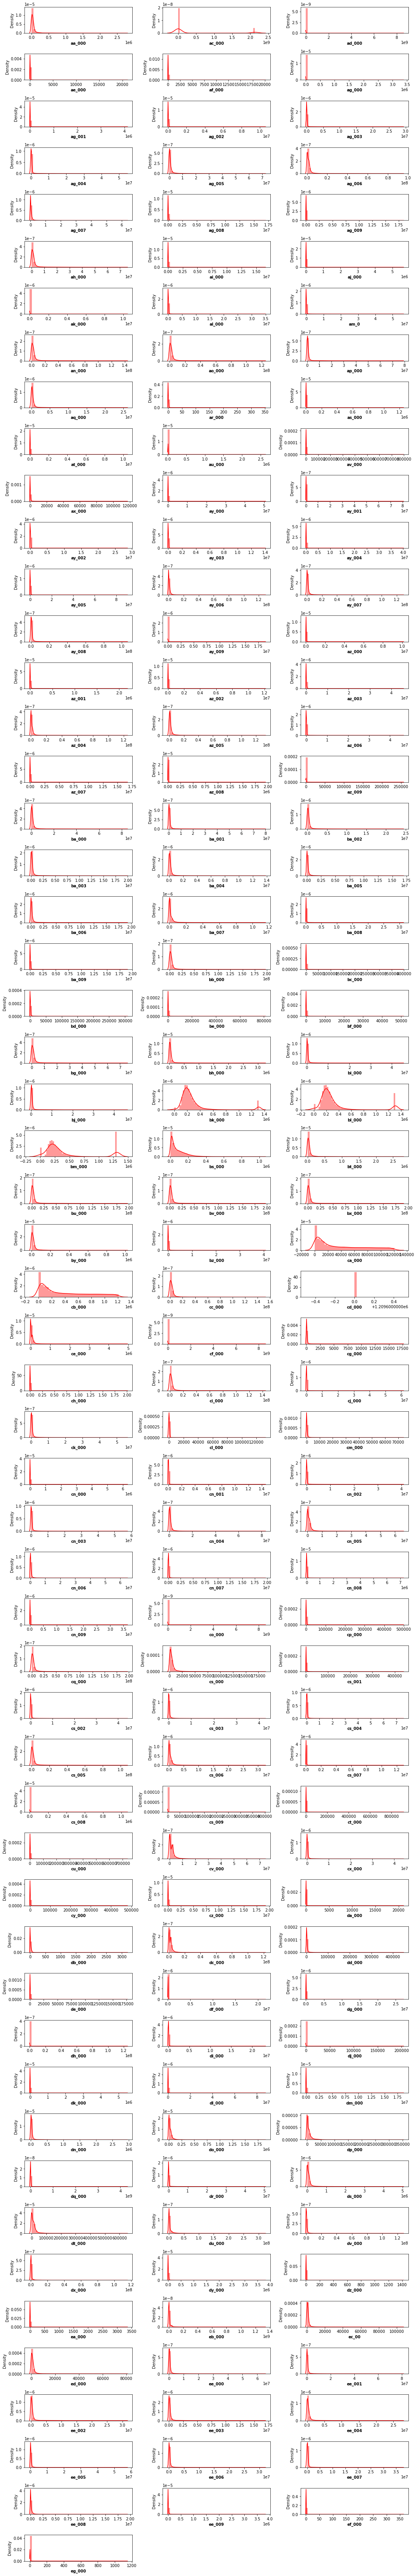

In [160]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15,100))
for i, col in enumerate(numeric_features):
    plt.subplot(60,3,i+1)
    sns.distplot(x=df[col], color='red')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

#### Report

 - As per the above plot most of the features are not normally distributed.
 - Transformation of data is not of prime importance since it is a classification problem.
 - Interpreting each and every column is not necessary as this is sensor data.

### Create Functions for model training and evaluation

In [163]:
def evaluate_cf(true,predicted):
    '''
    This function takes in true and predicted values
    Returns: Accuracy, F1 Score, Precision, Recall, ROC-AUC Curve
    '''
    
    acc = accuracy_score(true, predicted) # Accuracy
    f1 = f1_score(true, predicted) # F1 Score
    precision = precision_score(true, predicted) # Precision
    recall = recall_score(true, predicted) # Recall
    roc_auc = roc_auc_score(true, predicted) # ROC
    
    return acc, f1, precision, recall, roc_auc

In [165]:
# Create cost of model as per data description

def total_cost(y_true, y_pred):
    '''
    This function takes y_true, y_predicted and prints Total cost due to miscalculation
    '''
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [167]:
# Create a function which can evaluate models and return a report

def evaluate_moels(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    
    # Separate datasets into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Training the model
        
        # Make Predictions:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Training Set Performance:
        model_train_accuracy, model_train_f1, model_train_precision, model_train_recall, model_train_rocauc_score = \
        evaluate_clf(y_train, y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)
        
        # Test Set Performance:
        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = \
        evaluate_clf(y_test, y_train_pred)
        test_cost = total_cost(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])             
        
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

## Evaluate Model on Different experiments

In [168]:
# Manually splitting x and y for all experiments:

X= df.drop('class', axis=1)
y = df['class']

#### Manually Encoding Target Variable

Since we only have 2 values in the class, dont need to use any Encoder

In [169]:
y= y.replace({'pos': 1, 'neg': 0})

### Experiment: 1 = KNN Imputer for Null values

#### Why Robust scaler and not Standard scaler?

 - Scaling the data using Robust scaler
 - Since most of the independent variables are not normally distributed we cannot use Standardscaler
 
#### Why Robust Scaler and not Minmax?

 - Since most of the features have outliers. So Minmax will scale data according to Max values which is outlier.
 - This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).


In [170]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

#### Why KNN Imputer?

 - KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.
 - KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.
 - Here we Iterate through different K values and get accuracy and choose best K values.
 
 #### Finding the optimal n_neighbour value for KNN imputer

